# `Necessary Library`

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBRFRegressor,XGBRegressor
from sklearn.feature_selection import RFE
import calendar
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns',None)
%matplotlib inline

### `Data Dictionary`

In [124]:
pd.read_excel('data_dictionary.xlsx')

,Id,listing ID
0,name,name of the listing
1,host_id,host ID
2,host_name,name of the host
3,neighbourhood_group,location
4,neighbourhood,area
5,latitude,latitude coordinates
6,longitude,longitude coordinates
7,room_type,listing space type
8,price,price in dollars
9,minimum_nights,amount of nights minimum


### ` Data Loading `

In [125]:
df=pd.read_csv('train.csv').set_index('id')
df.head(6)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365
9944426,Lower Manhattan Luxury,51105827,Dax,Manhattan,Battery Park City,40.71192,-74.01572,Entire home/apt,225,90,1,2016-03-18,0.02,1,362


In [126]:
test=pd.read_csv('test.csv').set_index('id')
test.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
1525602,Perfect Temporary Brooklyn Home,1200603,Andrea,Brooklyn,Crown Heights,40.66751,-73.95867,Entire home/apt,2,121,2019-05-31,1.70,1,39
30430185,BIG APPLE - COMFY KING ROOM,224414117,Gabriel,Manhattan,Hell's Kitchen,40.75655,-73.99690,Private room,1,18,2019-05-05,2.49,30,364
21354525,Cozy Brooklyn Heights Getaway w/ Manhattan Access,11743513,Henry,Brooklyn,Brooklyn Heights,40.69252,-73.99121,Private room,1,87,2019-06-16,4.29,1,108
35995074,Amazing*Quiet*Sunny*Bedroom*PrivateLivingRm*Ch...,4128829,Sara,Queens,Ditmars Steinway,40.77292,-73.90101,Private room,9,0,NaN,NaN,2,365
34392081,Hello! This is a very cozy space in Williamsburg.,259630588,Alina,Brooklyn,Williamsburg,40.71863,-73.94980,Private room,1,28,2019-06-26,14.00,2,20


## `Null Vailue Impute`

In [127]:
df.isna().sum()

name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [128]:
test.isna().sum()

name                                 4
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       3070
reviews_per_month                 3070
calculated_host_listings_count       0
availability_365                     0
dtype: int64

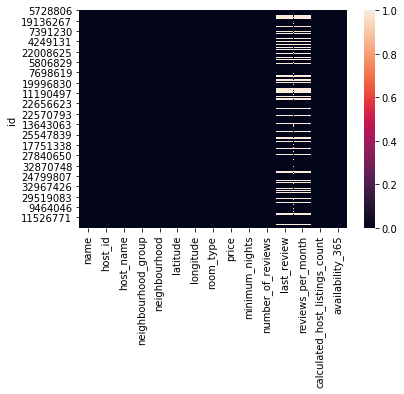

In [129]:
sns.heatmap(df.isna())

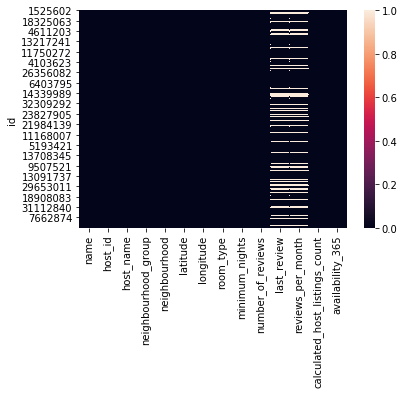

In [130]:
sns.heatmap(test.isna())

In [131]:
df.last_review=df.last_review.fillna('2011-01-01')

In [132]:
test.last_review=test.last_review.fillna('2011-01-01')

In [133]:
df.reviews_per_month=df.reviews_per_month.fillna(0)
test.reviews_per_month=test.reviews_per_month.fillna(0)

In [134]:
df.isna().sum()

name                              12
host_id                            0
host_name                         13
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [135]:
test.isna().sum()

name                              4
host_id                           0
host_name                         8
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# `EDA`

### `Univarent Analysis`

#### `Target Features distribution: Price`

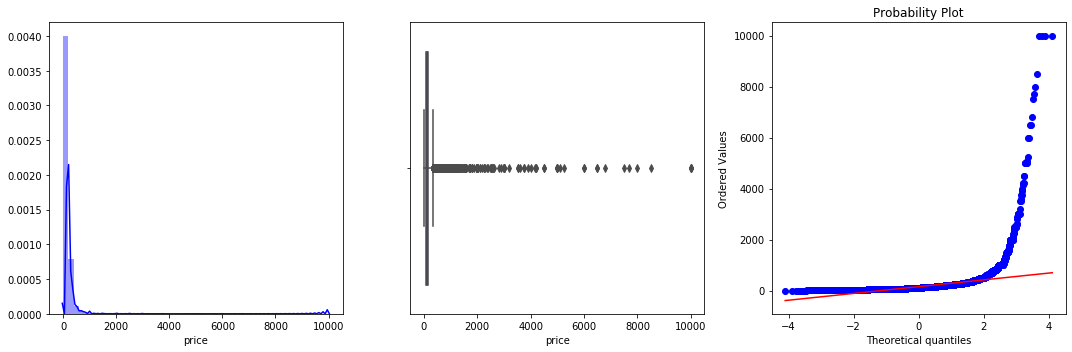

Skew: 18.815093682550792 
After Log_Transform:


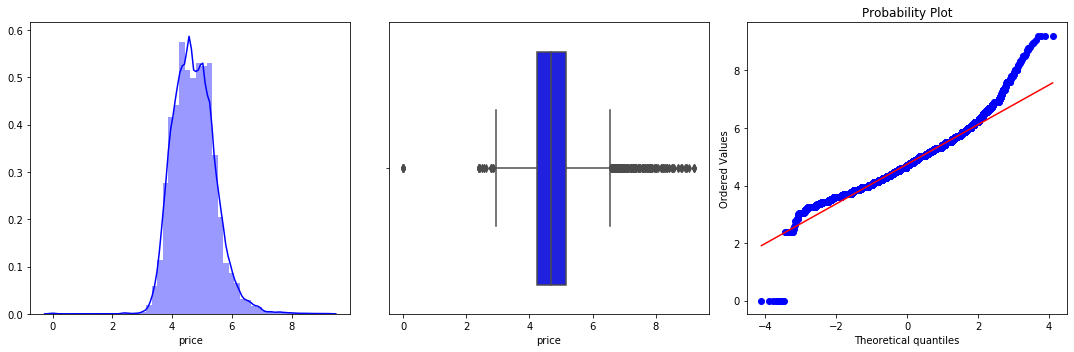

Skew: 0.5516886042775462


In [136]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(df['price'],color ='b')
plt.subplot(132)            
sns.boxplot(df['price'],color ='b')
plt.subplot(133) 
stats.probplot(df['price'],plot=plt)
plt.tight_layout()
plt.show() 
print('Skew:',df['price'].skew(),'\nAfter Log_Transform:') 
plt.figure(figsize=(20,5))
plt.subplot(141)
sns.distplot(np.log1p(df['price']),color ='b')
plt.subplot(142)            
sns.boxplot(np.log1p(df['price']),color ='b')
plt.subplot(143) 
stats.probplot(np.log1p(df['price']),plot=plt)
plt.tight_layout()
plt.show() 
print('Skew:',np.log1p(df['price']).skew()) 

### `Observation`:
`1. Maximum  price distribution is between  20 t0 400,So we have to focus on this range due to custoner bowness in this price range`

In [137]:
np.exp(6)

403.4287934927351

### `'neighbourhood_group','room_type','neighbourhood'`

In [138]:
cat_cols=['neighbourhood_group','room_type','neighbourhood']

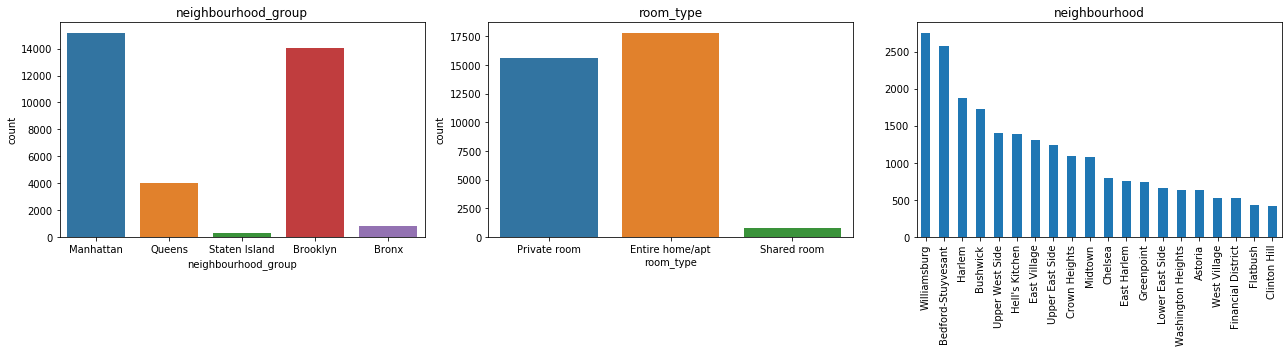

In [139]:
 for i in range(0,len(cat_cols),2):
            if len(cat_cols) > i+1:
                
                plt.figure(figsize=(18,5))
                plt.subplot(131)
                sns.countplot(df[cat_cols[i]])
                plt.title(cat_cols[i])
                plt.subplot(132)     
                sns.countplot(df[cat_cols[i+1]])
                plt.title(cat_cols[i+1])
                plt.subplot(133)
                df[cat_cols[i+2]].value_counts().iloc[:20].plot(kind='bar')
                plt.title(cat_cols[i+2])
                plt.tight_layout()
                plt.show()

### `Observation`:
`1. customer intrest are  more in Manhattan and Brooklyn due to High technology startup companies and bussinesses are there 2. Staten  Islands has very less intrest due to it is turist place and people visit there only on vacation.`
`3.Customer has highly intrest in private room or entire home more and very few customer choose shared room(Newyark is highly sophisticated place and people give more importance on privacy)`
`4.Top 20 Neighbourhood which customer often choose is shown in graph`

#### `Minimum_Nights`

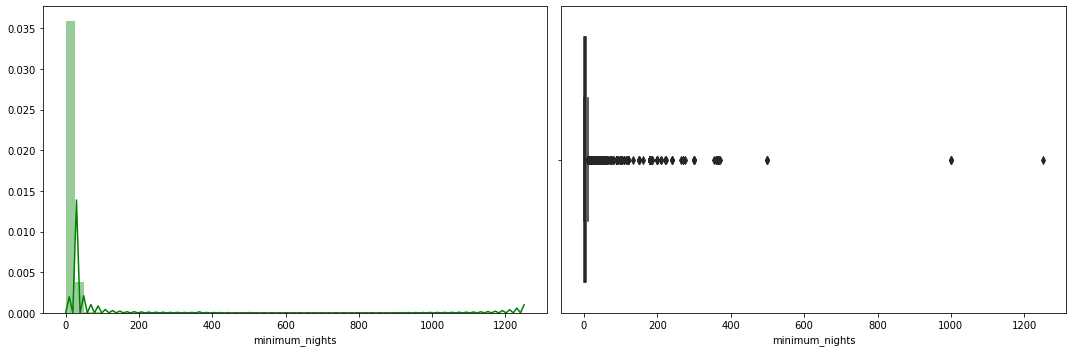

Skew: 23.999268051286446 
After Log_Transform:


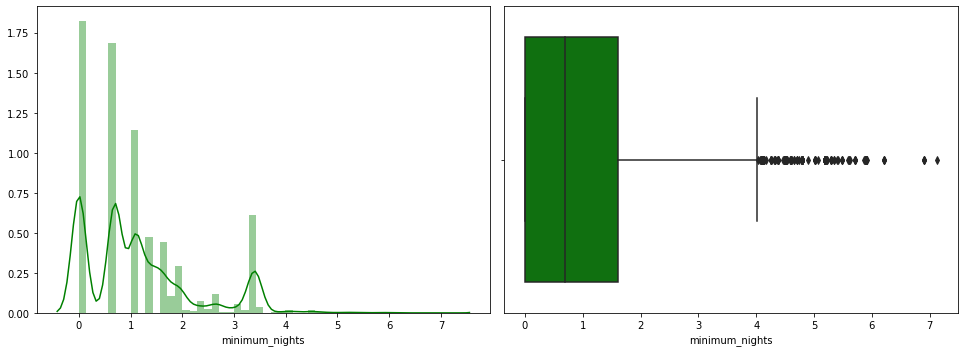

Skew: 1.1159827773728626


In [140]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['minimum_nights'],color ='g')
plt.subplot(122)            
sns.boxplot(df['minimum_nights'],color ='g')
plt.tight_layout()
plt.show() 
print('Skew:',df['minimum_nights'].skew(),'\nAfter Log_Transform:') 
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(np.log(df['minimum_nights']),color ='g')
plt.subplot(132)            
sns.boxplot(np.log(df['minimum_nights']),color ='g')
plt.tight_layout()
plt.show() 
print('Skew:',np.log(df['minimum_nights']).skew()) 

### `Observation`
`  A few customer which stayed more than 6 months,seems they are hired entire home for more period of times, also seems more loyal customer, i will describe it in Bivarient analysis`

### `Number_Of_Reviews`

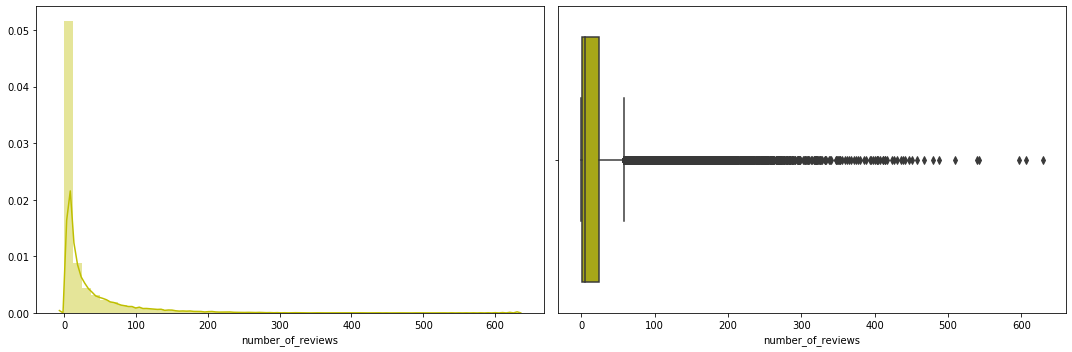

Skew: 3.6453649218348216 
After Log_Transform:


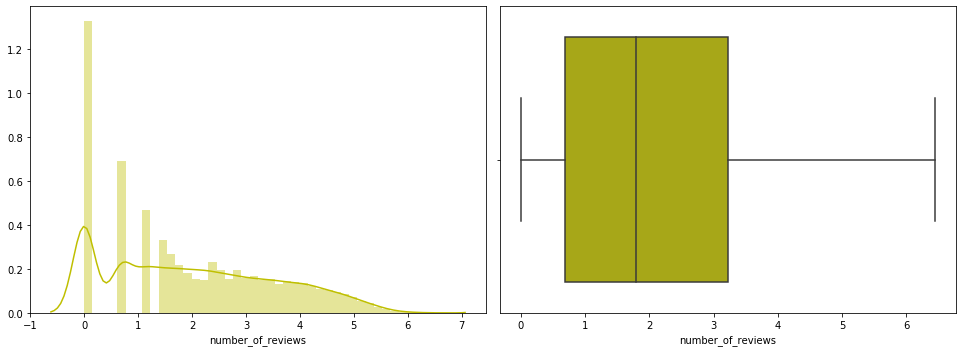

Skew: 0.35768611242741927


In [141]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['number_of_reviews'],color ='y')
plt.subplot(122)            
sns.boxplot(df['number_of_reviews'],color ='y')
plt.tight_layout()
plt.show() 
print('Skew:',df['number_of_reviews'].skew(),'\nAfter Log_Transform:') 
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(np.log1p(df['number_of_reviews']),color ='y')
plt.subplot(132)            
sns.boxplot(np.log1p(df['number_of_reviews']),color ='y')
plt.tight_layout()
plt.show() 
print('Skew:',np.log1p(df['number_of_reviews']).skew()) 

### `Observation`


### `Latest Review`

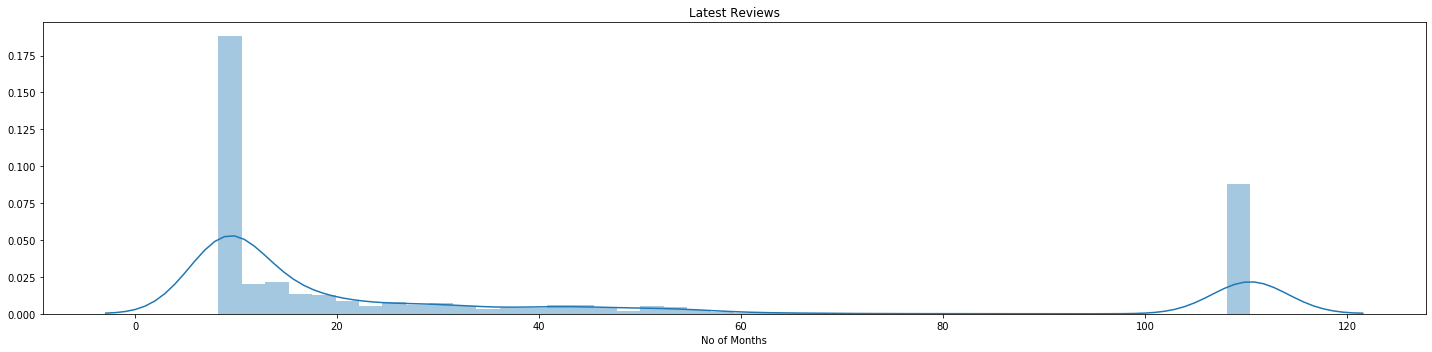

In [142]:
plt.figure(figsize=(20,5))
df.last_review=pd.to_datetime(df.last_review)
sns.distplot((pd.to_datetime('now')-df.last_review)/np.timedelta64(1,'M'))
plt.xlabel('No of Months')
plt.title('Latest Reviews')
plt.tight_layout()
plt.show() 

### `Observation`
`some of customer is not much intrested to give the rating,Or these customers are the initial customer`

### `reviews_per_month`

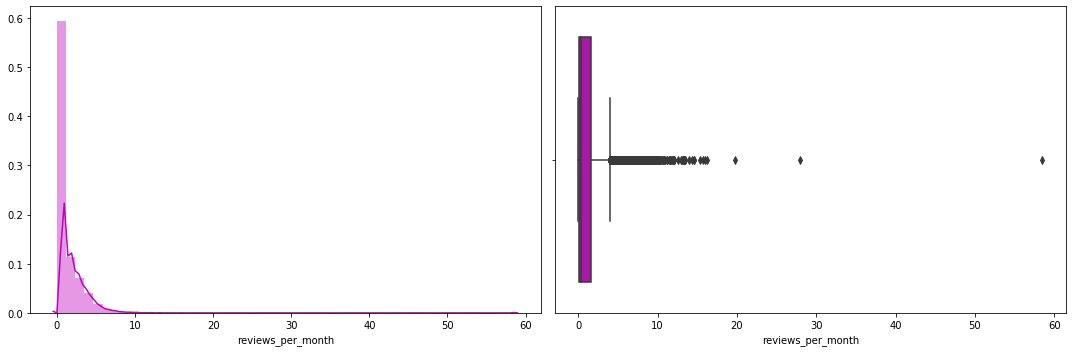

Skew: 3.6261179394883563 
After Log_Transform:


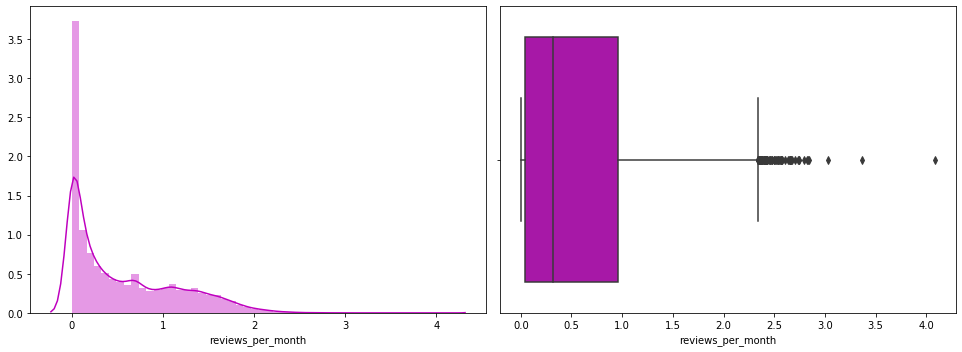

Skew: 0.9426734428973519


In [143]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['reviews_per_month'],color ='m')
plt.subplot(122)            
sns.boxplot(df['reviews_per_month'],color ='m')
plt.tight_layout()
plt.show() 
print('Skew:',df['reviews_per_month'].skew(),'\nAfter Log_Transform:') 
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(np.log1p(df['reviews_per_month']),color ='m')
plt.subplot(132)            
sns.boxplot(np.log1p(df['reviews_per_month']),color ='m')
plt.tight_layout()
plt.show() 
print('Skew:',np.log1p(df['reviews_per_month']).skew()) 

### `Observation`

### `amount of listing per host`

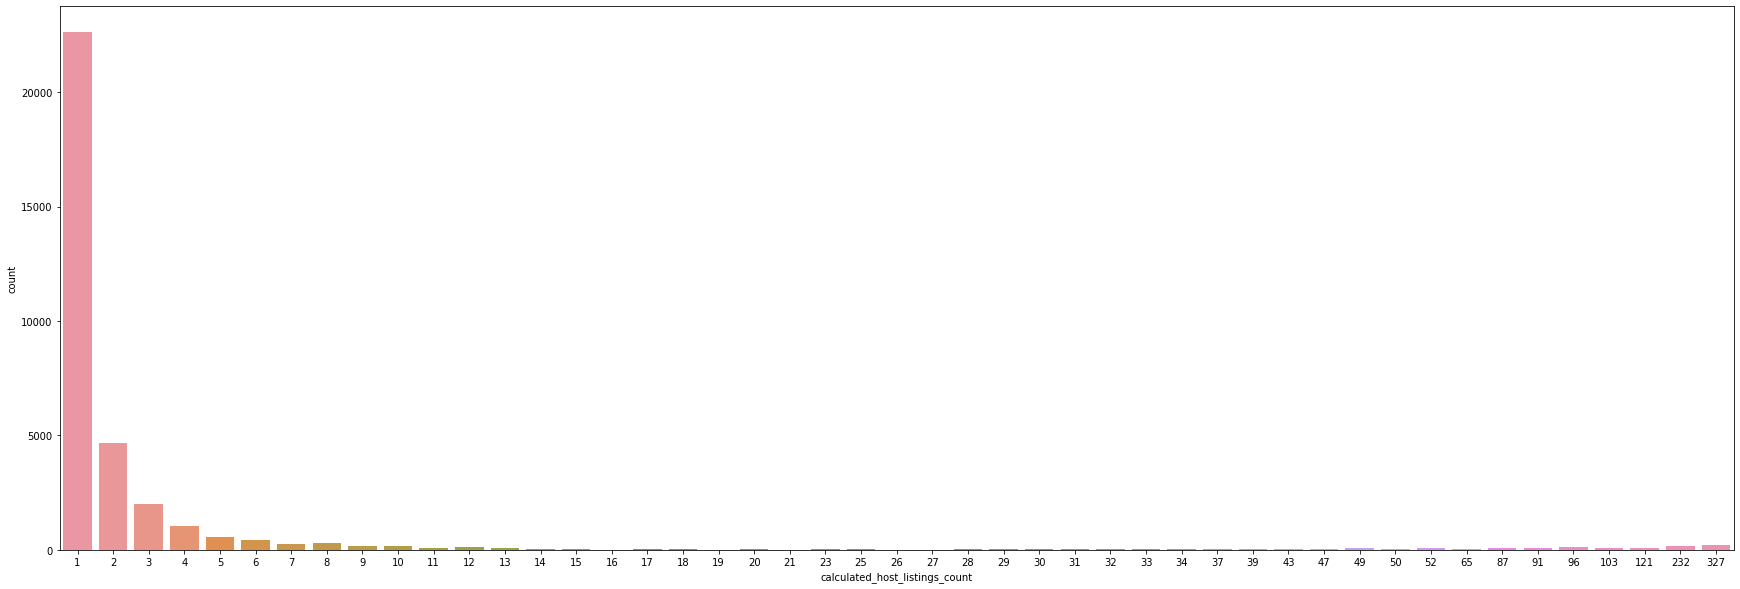

In [144]:
plt.figure(figsize=(30,10))
sns.countplot(df['calculated_host_listings_count'])

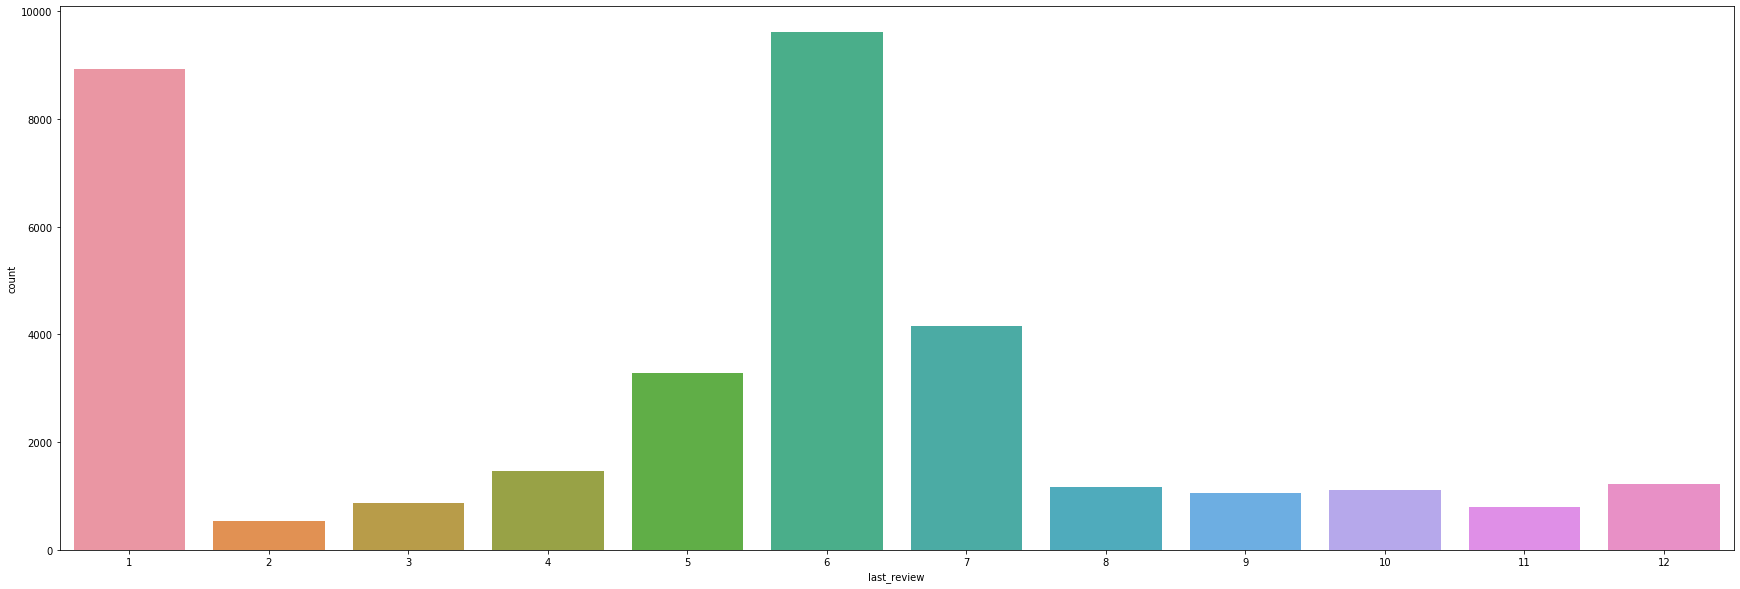

In [147]:
plt.figure(figsize=(30,10))
sns.countplot(df.last_review.dt.month)

### `Observation`
`it seems that few hotels is also part of this networking which has maximum availablity of rooms
and June has highest demand as comapre to other month then we can increase the processing fee for this month`

### `availability_365`

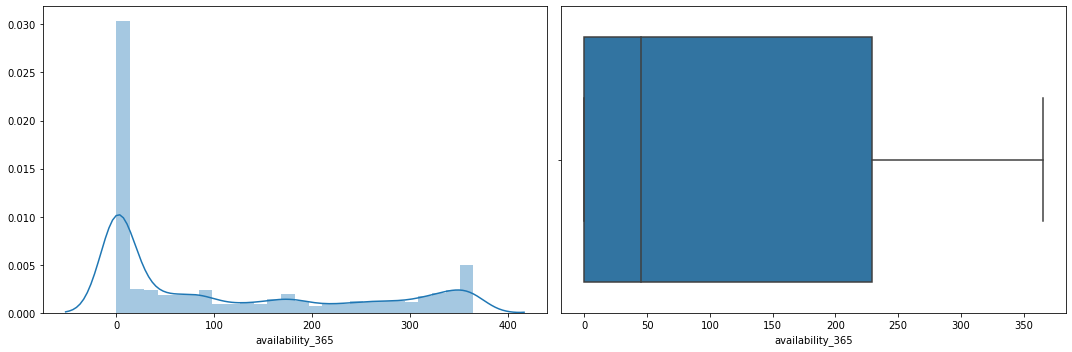

Skew: 0.7559912498636655


In [25]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['availability_365'])
plt.subplot(122)            
sns.boxplot(df['availability_365'])
plt.tight_layout()
plt.show() 
print('Skew:',df['availability_365'].skew()) 


In [26]:
df1=df[['host_id','availability_365']]
pd.crosstab(df.host_id,df.availability_365)[0].value_counts()

0     15758
1     11234
2       394
3        45
4         8
7         3
5         3
6         2
11        1
9         1
Name: 0, dtype: int64

### `Observation`
`some room are available for 365 days and some are not available for us, may be they are booked for other organisation..make loop of those rooms`

#### `Top Trending word`

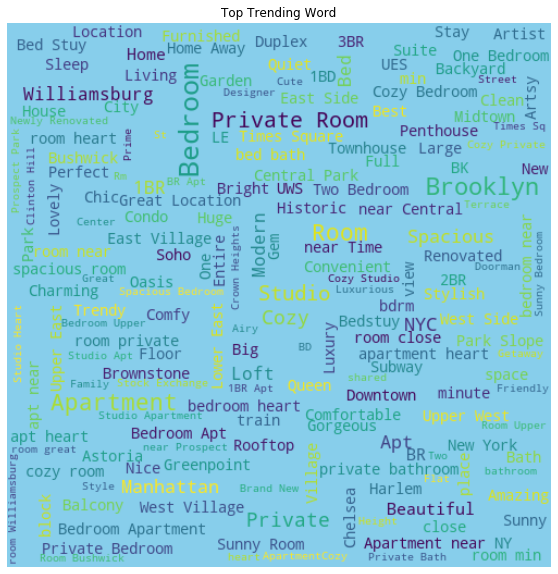

In [27]:
text = df.name.str.cat(sep='')
wordcloud = WordCloud(width=500, height=500, max_font_size=25, min_font_size=10,background_color="skyblue", max_words=200).generate(text)
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top Trending Word')
plt.margins(x=0, y=0)
plt.show()

### `Observation`
`We  can see here some words trending more,i am describing some of words from it like..
1.brooklyne and Manhattan are most demanded place.
2.neighbourehood like Williamsburge,Bedford-Stuyvesant,East Village ,Harlem etc.. are most favorable neighbourhood.
and a lots of words which describe the atributes of Home on which we have to focus for give the satisfactory home to customer..`

# `Bivarent Analysis`

### ` Location `

In [29]:
df.longitude.min(),df.longitude.max()

(-74.24441999999998, -73.71299)

In [30]:
df.latitude.min(),df.latitude.max()

(40.49979, 40.91306)

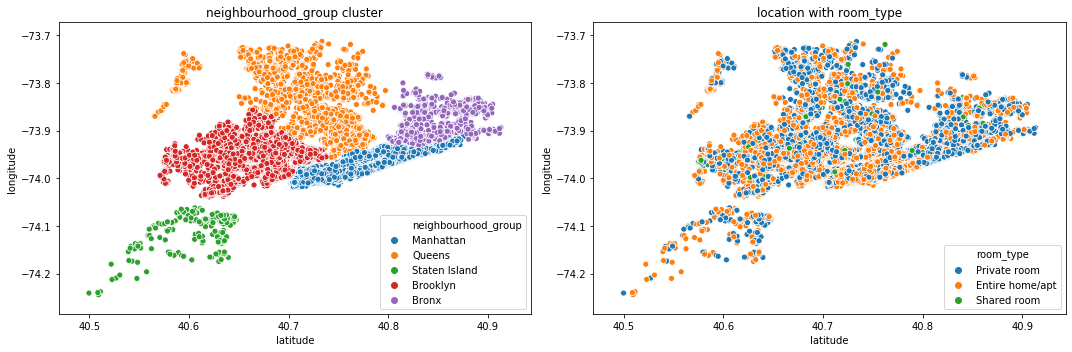

In [31]:

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(df.latitude,df.longitude,hue=df['neighbourhood_group'])
plt.title('neighbourhood_group cluster')
plt.subplot(122)
sns.scatterplot(df.latitude,df.longitude,hue=df['room_type'])
plt.title('location with room_type')
plt.tight_layout()
plt.show()

In [32]:
df1=df[df.price>1000]

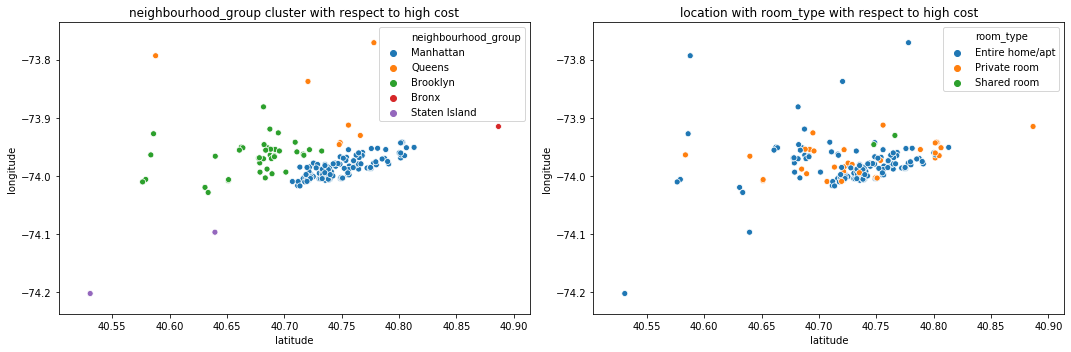

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(df1.latitude,df1.longitude,hue=df1['neighbourhood_group'])
plt.title('neighbourhood_group cluster with respect to high cost')
plt.subplot(122)
sns.scatterplot(df1.latitude,df1.longitude,hue=df1['room_type'])
plt.title('location with room_type with respect to high cost')
plt.tight_layout()
plt.show()

`highly paid room(more than 1000) are in manhattean and Brooklyne and also maximum of them posesed the entire home`

In [155]:
df1=df[df.price<500]

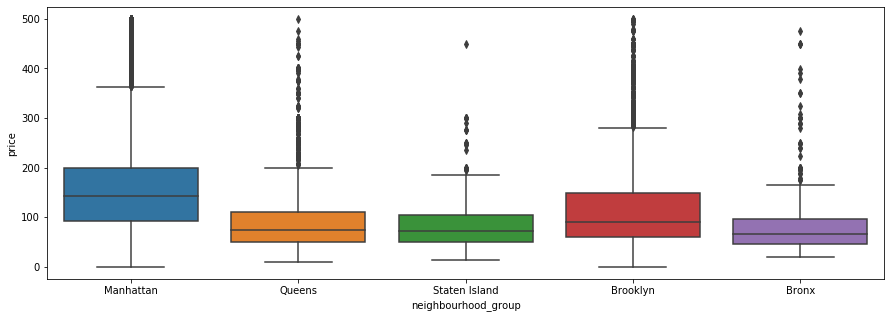

In [157]:
plt.figure(figsize=(15,5))
sns.boxplot(df1.neighbourhood_group,df1.price)

### `Observation`
` price distribution in Manhatten is more as compared to other `

### `neighbourhood_group and room_type  based on Price`

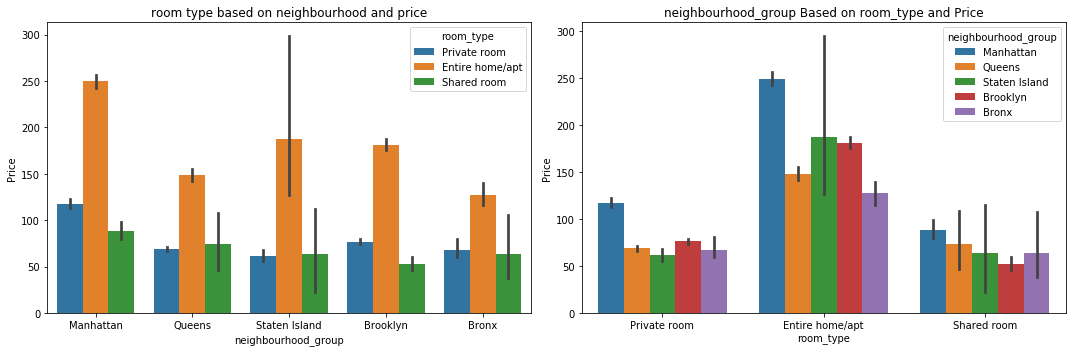

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=df)
plt.ylabel("Price")
plt.title("room type based on neighbourhood and price")
plt.subplot(122)
sns.barplot(x="room_type", y="price", hue="neighbourhood_group", data=df)
plt.ylabel("Price")
plt.title("neighbourhood_group Based on room_type and Price")
plt.tight_layout()
plt.show()

### `Observation`
`1. From above observation we can say that Manhattan is more costlier than other cities and Entire room/apt is also costilier `

### `minimum nights with respect to price and neighbourhood group`

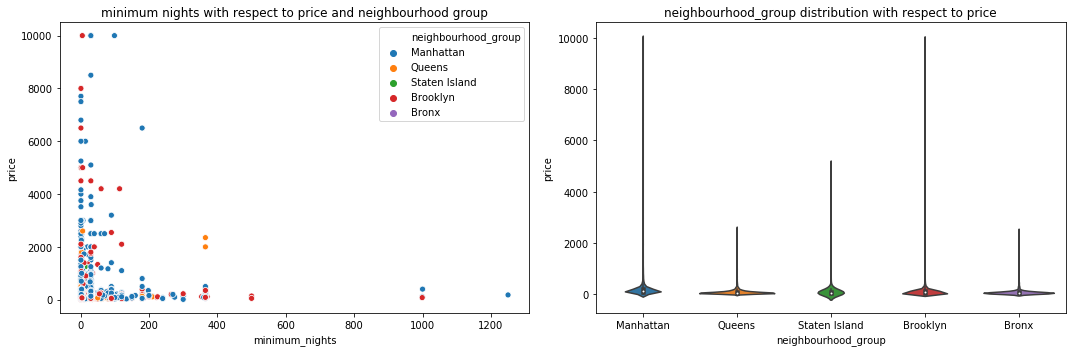

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(df['minimum_nights'],df.price,hue=df['neighbourhood_group'])
plt.title('minimum nights with respect to price and neighbourhood group')
plt.subplot(122)
sns.violinplot(df['neighbourhood_group'],df.price)
plt.title('neighbourhood_group distribution with respect to price')
plt.tight_layout()
plt.show()

### ` Observation`
`In Manhattan some of room which have high no of host listing count`

In [34]:
df.calculated_host_listings_count.max()

327

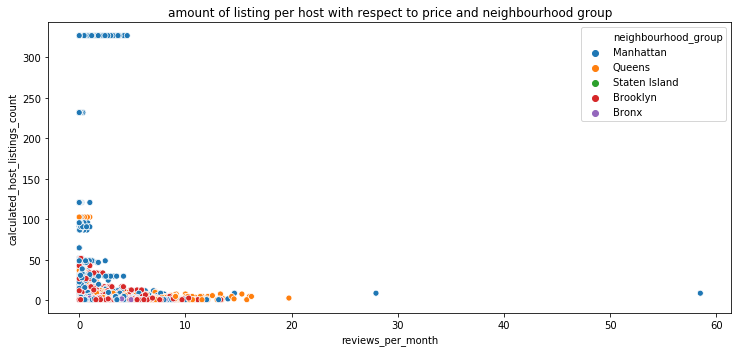

In [35]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.scatterplot(df['reviews_per_month'],df['calculated_host_listings_count'],hue=df['neighbourhood_group'])
plt.title('amount of listing per host with respect to price and neighbourhood group')
plt.tight_layout()
plt.show()

### ` Observation`

### `Availabality`

Text(0.5, 1.0, 'Availability distribution in cities')

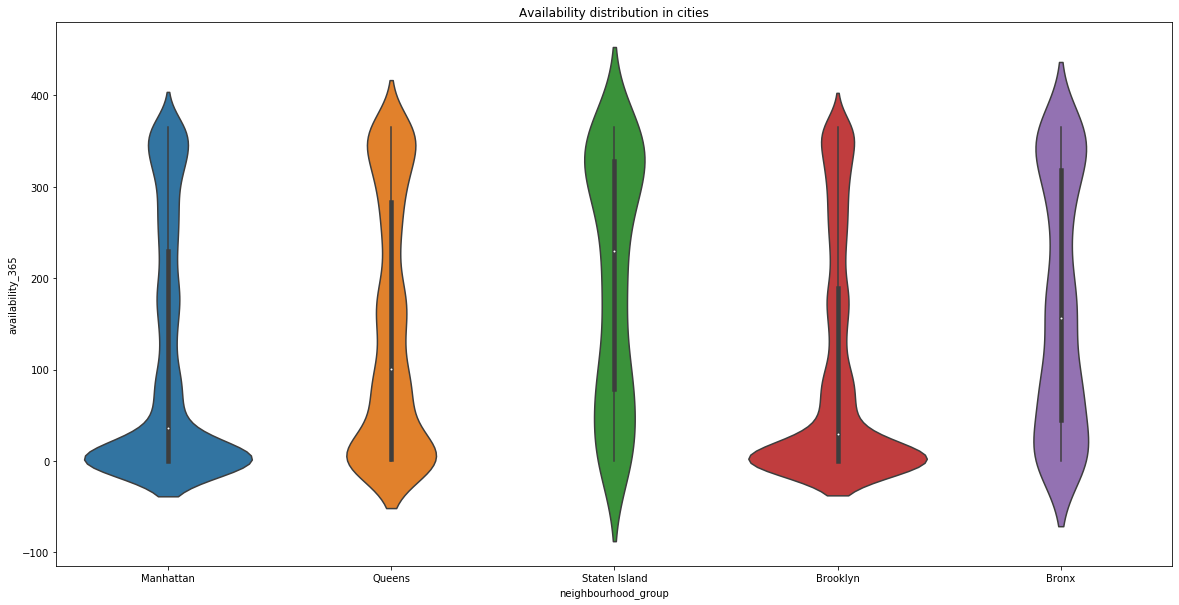

In [36]:
plt.figure(figsize=(20,10))
sns.violinplot(df["neighbourhood_group"],df['availability_365'])
plt.title('Availability distribution in cities')

### ` Observation`
`In Manhattan and Brooklyne we can see that a little spike near 'zero' ,it means the room demand in this area is more,So we have to focus in this area for make availble the room for good bussiness`.

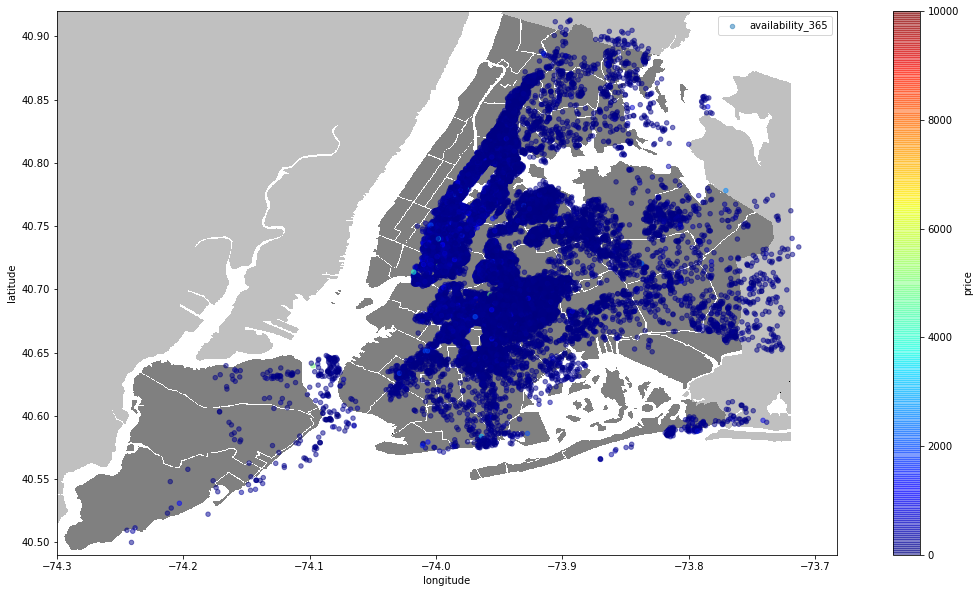

In [158]:
import urllib
#initializing the figure size
plt.figure(figsize=(20,10))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.3, -73.72, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.5, zorder=5)
plt.legend()
plt.show()

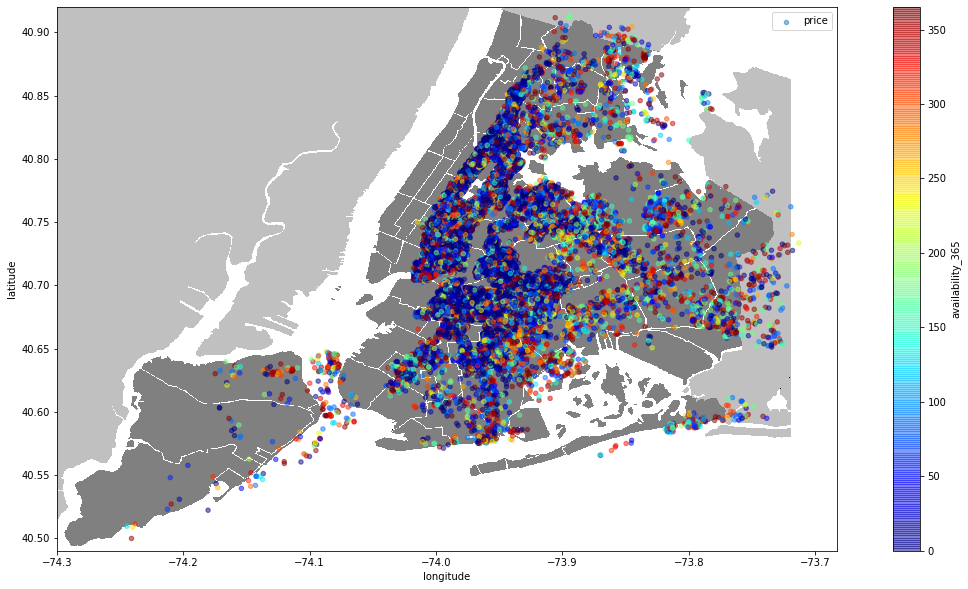

In [41]:
import urllib
#initializing the figure size
plt.figure(figsize=(20,10))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.3, -73.72, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df.plot(kind='scatter', x='longitude', y='latitude',label='price', c='availability_365', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.5, zorder=5)
plt.legend()
plt.show()

` from above plot we can say that all price distribution is 2000 dollers`

# `Preprocessing`

#### ` Removing Columns on basis of analysis`

In [159]:
df.last_review=pd.to_datetime(df.last_review)
test.last_review=pd.to_datetime(test.last_review)

In [160]:
df['last_review_months']=((pd.to_datetime('now')-df.last_review)/np.timedelta64(1,'M'))
test['last_review_months']=((pd.to_datetime('now')-test.last_review)/np.timedelta64(1,'M'))

In [161]:
#removing the first three columns
df=df.iloc[:,3:]
test=test.iloc[:,3:]

In [162]:
#droping the last_review and lat long columns
df=df.drop('last_review',axis=1)
test=test.drop('last_review',axis=1)

In [163]:
# df=df.drop(['latitude','longitude'],axis=1)
# test=test.drop(['latitude','longitude'],axis=1)

#### `Skew Detection`

In [164]:
def cat_data(data):
    cat_data=data.select_dtypes(include='object')
    return cat_data

def Num_data(data):
    num_data=data.select_dtypes(exclude='object')
    return num_data
num_data=Num_data(df)
num_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_months
id,,,,,,,,,
5728806,40.72217,-73.99481,120,7,3,0.06,3,0,54.435359
2243769,40.80020,-73.96045,1500,1,0,0.00,1,0,110.420082
35515415,40.75558,-73.89316,200,2,4,4.00,1,365,8.339957
36202006,40.60110,-74.07830,30,2,0,0.00,4,82,110.420082
3780951,40.81022,-73.94266,115,1,16,0.27,1,365,9.654152


In [165]:
num_test=Num_data(test)
num_test.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_months
id,,,,,,,,
1525602,40.66751,-73.95867,2,121,1.70,1,39,9.489878
30430185,40.75655,-73.99690,1,18,2.49,30,364,10.344105
21354525,40.69252,-73.99121,1,87,4.29,1,108,8.964200
35995074,40.77292,-73.90101,9,0,0.00,2,365,110.420082
34392081,40.71863,-73.94980,1,28,14.00,2,20,8.635651


In [166]:
# cat data
Cat_data=cat_data(df)
Cat_data.head()

,neighbourhood_group,neighbourhood,room_type
id,,,
5728806,Manhattan,Nolita,Private room
2243769,Manhattan,Upper West Side,Entire home/apt
35515415,Queens,East Elmhurst,Entire home/apt
36202006,Staten Island,Concord,Shared room
3780951,Manhattan,Harlem,Shared room


In [167]:
cat_test=cat_data(test)
cat_test.head()

,neighbourhood_group,neighbourhood,room_type
id,,,
1525602,Brooklyn,Crown Heights,Entire home/apt
30430185,Manhattan,Hell's Kitchen,Private room
21354525,Brooklyn,Brooklyn Heights,Private room
35995074,Queens,Ditmars Steinway,Private room
34392081,Brooklyn,Williamsburg,Private room


In [168]:
# Skew detection
skew=num_data.skew()
skew

latitude                           0.239973
longitude                          1.277263
price                             18.815094
minimum_nights                    23.999268
number_of_reviews                  3.645365
reviews_per_month                  3.626118
calculated_host_listings_count     7.969708
availability_365                   0.755991
last_review_months                 1.188962
dtype: float64

In [169]:
skew_r=num_test.skew()
skew_r

latitude                           0.230432
longitude                          1.300628
minimum_nights                    17.306502
number_of_reviews                  3.795289
reviews_per_month                  2.498199
calculated_host_listings_count     7.850537
availability_365                   0.780870
last_review_months                 1.154413
dtype: float64

In [170]:
for col in num_data.columns[2:]:
    num_data[col]=np.log1p(num_data[col])
 

In [171]:
for col in num_test.columns[2:]:
    num_test[col]=np.log1p(num_test[col])

#### `Outlier detection`

In [172]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(num_data)

,Feature,Number of Outliers
0,latitude,301
1,longitude,1965
2,price,458
3,minimum_nights,539
4,number_of_reviews,0
5,reviews_per_month,81
6,calculated_host_listings_count,3907
7,availability_365,0
8,last_review_months,0


In [173]:
detect_outliers(num_test)

,Feature,Number of Outliers
0,latitude,119
1,longitude,863
2,minimum_nights,208
3,number_of_reviews,0
4,reviews_per_month,59
5,calculated_host_listings_count,1734
6,availability_365,0
7,last_review_months,0


In [174]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    return dataframe    

#num_data=treat_outliers(num_data)

In [175]:
#num_test=treat_outliers(num_test)

In [176]:
df=pd.concat([num_data,Cat_data],axis=1)

In [177]:
test=pd.concat([num_test,cat_test],axis=1)

### ` Feature Selection`

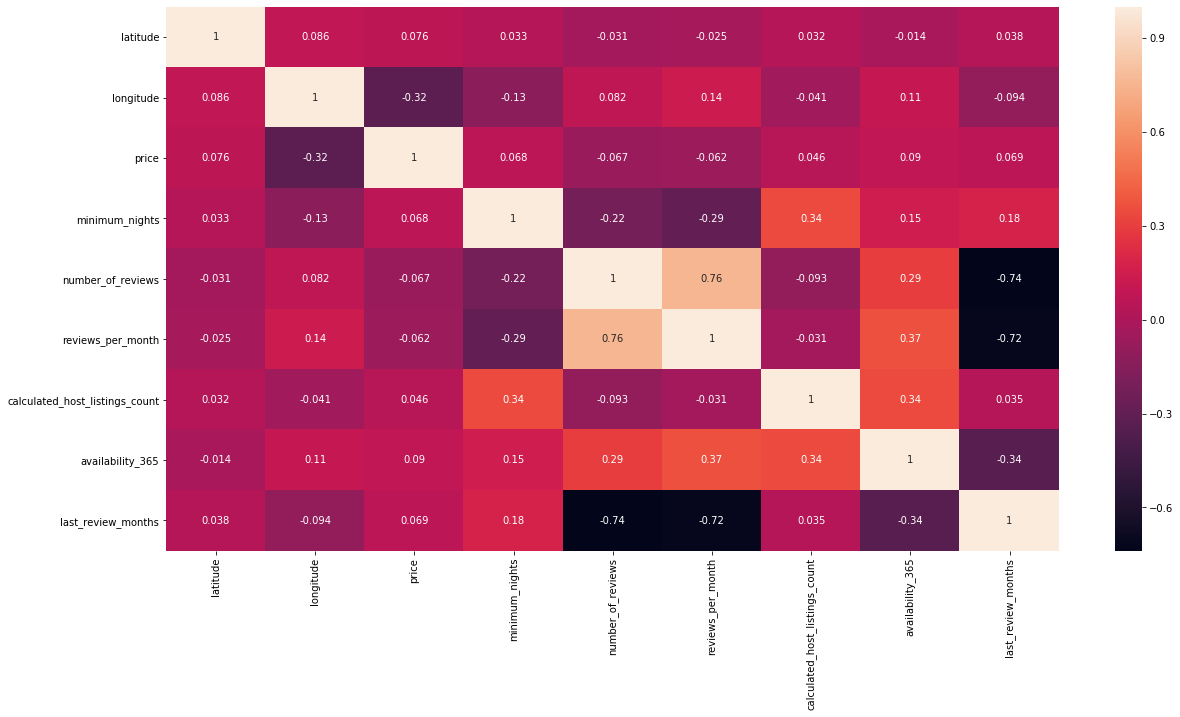

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [39]:
corr=df.corr().stack().reset_index()
corr=corr[~(corr[0]==1)].rename(columns={'level_0':'F1','level_1':'F2',0:'Value'})
corr

,F1,F2,Value
1,host_id,latitude,0.021635
2,host_id,longitude,0.128007
3,host_id,price,0.013679
4,host_id,minimum_nights,-0.013519
5,host_id,number_of_reviews,-0.142471
6,host_id,reviews_per_month,0.207184
7,host_id,calculated_host_listings_count,0.154071
8,host_id,availability_365,0.199093
9,latitude,host_id,0.021635
11,latitude,longitude,0.085919


` 'No of review' is corelated with reviews per month `

In [40]:
# target to dependent feature corealation

<Figure size 2160x1440 with 0 Axes>

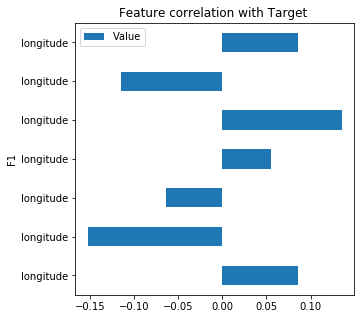

<Figure size 2160x1440 with 0 Axes>

In [179]:
corr1=corr.iloc[17:26].set_index('F1').drop('price')
corr1.plot(kind='barh',figsize=(5,5))
plt.title('Feature correlation with Target ')
plt.figure(figsize=(30,20))

 ` Lat long are not much important feature logically but fortunatlly it showing a good relation with target so we can keep it for this data`

### `Encoding`

In [180]:
df=pd.get_dummies(df)
df.isna().sum()

latitude                                    0
longitude                                   0
price                                       0
minimum_nights                              0
number_of_reviews                           0
reviews_per_month                           0
calculated_host_listings_count              0
availability_365                            0
last_review_months                          0
neighbourhood_group_Bronx                   0
neighbourhood_group_Brooklyn                0
neighbourhood_group_Manhattan               0
neighbourhood_group_Queens                  0
neighbourhood_group_Staten Island           0
neighbourhood_Allerton                      0
neighbourhood_Arden Heights                 0
neighbourhood_Arrochar                      0
neighbourhood_Arverne                       0
neighbourhood_Astoria                       0
neighbourhood_Bath Beach                    0
neighbourhood_Battery Park City             0
neighbourhood_Bay Ridge           

In [181]:
test=pd.get_dummies(test)
test.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_months,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fort Wadsworth,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhood_Neponsit,neighbourhood_New Brighton,neighbourhood_New Dorp,neighbourhood_New Dorp Beach,neighbourhood_New Springville,neighbourhood_NoHo,neighbourhood_Nolita,neighbourhood_North Riverdale,neighbourhood_Norwood,neighbou

### `Modeling`

In [182]:
X=df.drop('price',axis=1)
y=df.price

In [183]:
#X=X.drop(X.iloc[:,118:128].columns,axis=1)
b = set(test.columns)-set(df.columns)
b

{'neighbourhood_Fort Wadsworth',
 'neighbourhood_New Dorp',
 'neighbourhood_Willowbrook',
 'neighbourhood_Woodrow'}

In [184]:
a = set(X.columns)-set(test.columns)
a

{'neighbourhood_Breezy Point',
 'neighbourhood_Co-op City',
 'neighbourhood_Howland Hook',
 'neighbourhood_Mariners Harbor',
 'neighbourhood_Midland Beach',
 'neighbourhood_Mill Basin',
 'neighbourhood_Olinville',
 "neighbourhood_Prince's Bay",
 'neighbourhood_Richmondtown',
 'neighbourhood_Rossville',
 'neighbourhood_Silver Lake',
 'neighbourhood_Unionport',
 'neighbourhood_West Farms',
 'neighbourhood_Westerleigh'}

In [185]:
X.drop(list(a),axis=1,inplace=True)
test.drop(list(b),axis=1,inplace=True)

In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

#### `Scaling`

In [187]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X=scaler.fit_transform(X)
test=scaler.transform(test)

### `Linear model`

In [188]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)

In [194]:
def model(model,X_train,X_test,y_train,y_test):
    mod=model()
    mod.fit(X_train,y_train)
    y=mod.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y))
    r2=mod.score(X_test,y_test)
    return rmse,r2

In [195]:
#Ridge
model(Ridge,X_train,X_test,y_train,y_test)


(0.46835447776191996, 0.5426767573455986)

In [196]:
#Lasso
model(Lasso,X_train,X_test,y_train,y_test)

(0.6926136852119741, -0.00012908582041082362)

In [66]:
r=Ridge(alpha=10,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=0)

In [67]:
r.fit(X_train,y_train)
y_r=r.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_r))
rmse

0.46833576140048183

In [72]:
np.exp(y_r).max()

531.4649235963989

In [73]:
r.score(X_test,y_test)

0.5427133076786657

In [74]:
# poly=PolynomialFeatures()
# X_train=poly.fit_transform(X_train)
# X_test=poly.transform(X_test)

### `Decision Tree`

In [75]:
tree=DecisionTreeRegressor()

In [76]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [77]:
tree.score(X_test,y_test)

0.2349182196260291

### `Random forest`

In [79]:
mod=RandomForestRegressor(    n_estimators=500,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=2,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None)

In [66]:
mod.fit(X_train,y_train)
y_r=mod.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_r))
mod.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  4.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished


0.5857718059623727

In [159]:
mod.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.4s finished


0.6446425097221857

### `Xgb boosting`

In [88]:
 Xc=XGBRegressor(random_state=0)

In [89]:
Xc.fit(X_train,y_train)
y_r=Xc.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_r))


[08:34:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [90]:
Xc.score(X_test,y_test)

0.6393028227332039

### `Support Vector Regressor`

In [1]:
from sklearn.svm import SVR

In [2]:
svr=SVR(kernel='linear',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=True,
    max_iter=-1,)

In [ ]:
svr.fit(X_train,y_train)

[LibSVM]

In [ ]:
svr.score(X_test,y_test)

` Random_forest`

In [ ]:
rf=RandomForestRegressor()
parameter_grid = {'n_estimators':(100,1000),
                  "max_depth":(2,7),
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False]}
random=RandomizedSearchCV(estimator=rf,param_distributions=parameter_grid)
random.fit(X_train,y_train)
random.score(X_test,y_test)

In [ ]:
mod.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


building tree 334 of 500
building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500


In [ ]:
X.shape

In [ ]:
y_p=mod.predict(test)

In [60]:
submission=pd.DataFrame(y_p,index=test.index,columns=['price'])

In [61]:
submission.to_csv('new2.csv')